In [1]:
%matplotlib notebook

import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

from diffusion_equation import *
from rope import *

In [ ]:
# Run cell to increase font sizes. Usefull when saving plots
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

# Exercise B

<IPython.core.display.Javascript object>


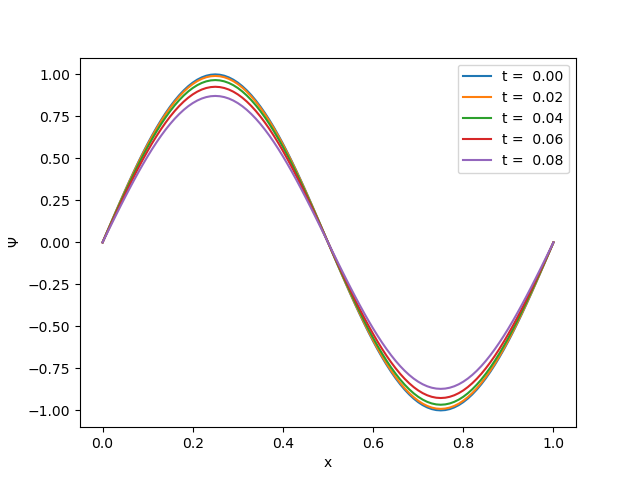

<IPython.core.display.Javascript object>


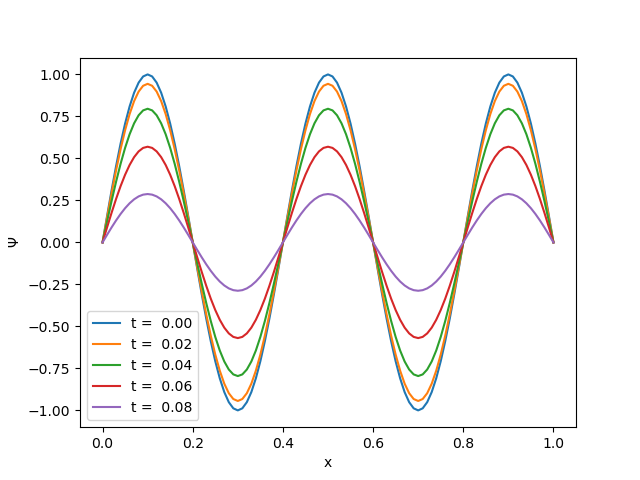

<IPython.core.display.Javascript object>


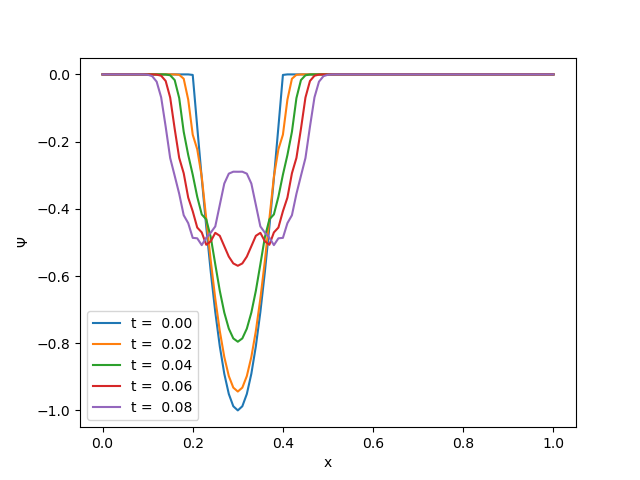

In [2]:
dx = 0.01
dt = 0.001

initial_position_functions = (
    lambda x: math.sin(2 * math.pi * x),
    lambda x: math.sin(5 * math.pi * x),
    lambda x: math.sin(5 * math.pi * x) if 0.2 < x < 0.4 else 0,
)

for initial_position_function in initial_position_functions:
    initial_position = [initial_position_function(x) for x in np.arange(0, 1 + dx, dx)]

    initial_position_table = [initial_position, initial_position]  # No initial velocity

    rope = Rope(initial_position_table, 1, dt, dx)
    rope.plot()

# Exercise C

In [3]:
def exercise_C(initial_position_function):
    initial_position = [initial_position_function(x) for x in np.arange(0, 1 + dx, dx)]

    initial_position_table = [initial_position, initial_position]  # No initial velocity

    rope = Rope(initial_position_table, 1, dt, dx)
    rope.animate()

<IPython.core.display.Javascript object>


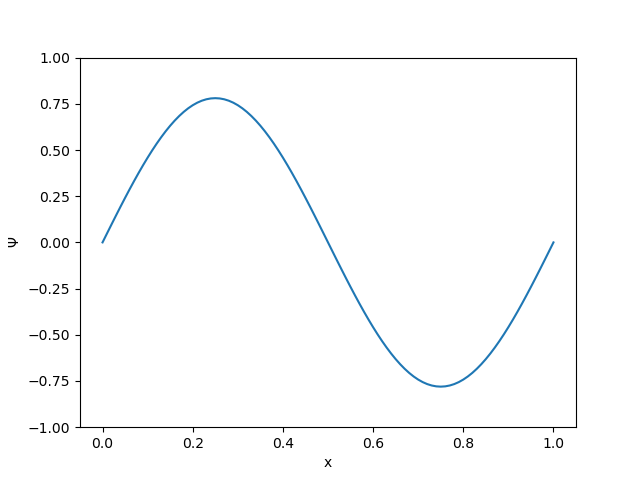

In [4]:
exercise_C(initial_position_functions[0])

<IPython.core.display.Javascript object>


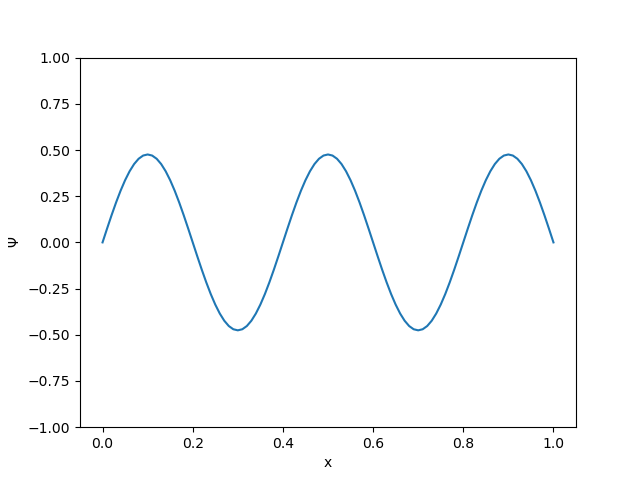

In [5]:
exercise_C(initial_position_functions[1])

<IPython.core.display.Javascript object>


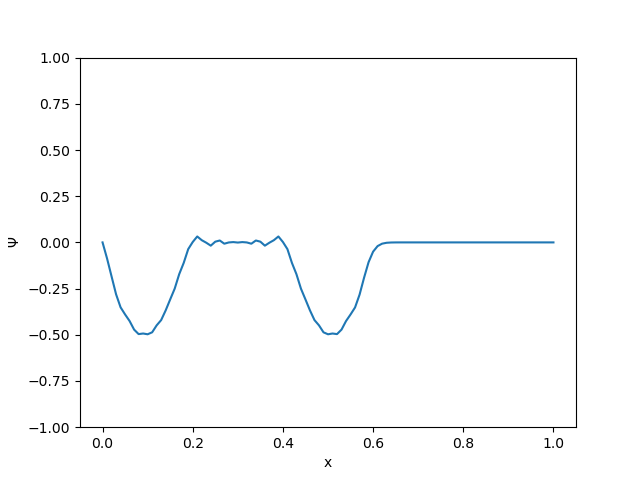

In [6]:
exercise_C(initial_position_functions[2])

# Exercise E

<IPython.core.display.Javascript object>


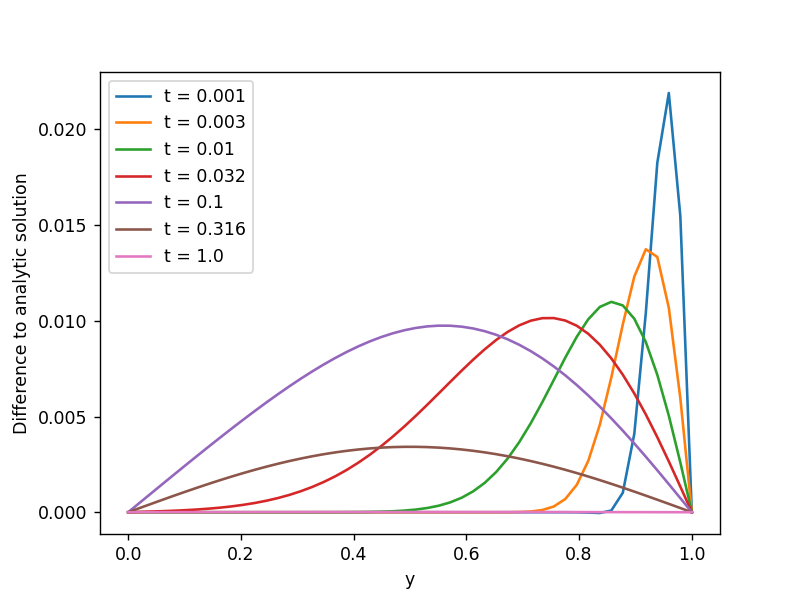

<IPython.core.display.Javascript object>


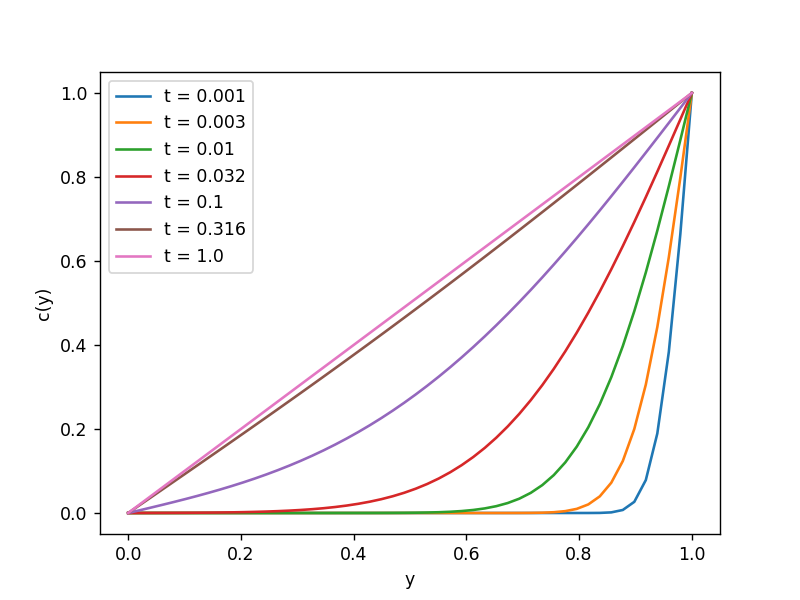

In [9]:
sim = FiniteDifference(D=1, N=50)

t_values = [round(0.1**i, 3) for i in np.linspace(0, 3, 7, endpoint = True)]
differences = {}
sim_data = {}

while True:
    # print progress
    if sim.t*100 % 1 == 0:
        print(f"{sim.t*100:.0f}%     ", end="\r")
        
    if sim.t in t_values:    
        analytic = np.array([sim.analytic_sol(x, sim.t, 10**-8) for x in np.linspace(0, 1, len(sim.c))])
        simulate = sim.only_y()

        differences[sim.t] = simulate - analytic
        sim_data[sim.t] = simulate

    if sim.t == max(t_values):
        break

    sim.update()

plt.figure()

for key, value in differences.items():
    plt.plot(np.linspace(0, 1, len(sim.c)), value, label = f"t = {key}")

plt.xlabel("y")
plt.ylabel("Difference to analytic solution")
plt.legend()
plt.show()

plt.figure()

for key, value in sim_data.items():
    plt.plot(np.linspace(0, 1, len(sim.c)), value, label = f"t = {key}")

plt.xlabel("y")
plt.ylabel("c(y)")
plt.legend()
plt.show()

# Exercise F

<IPython.core.display.Javascript object>


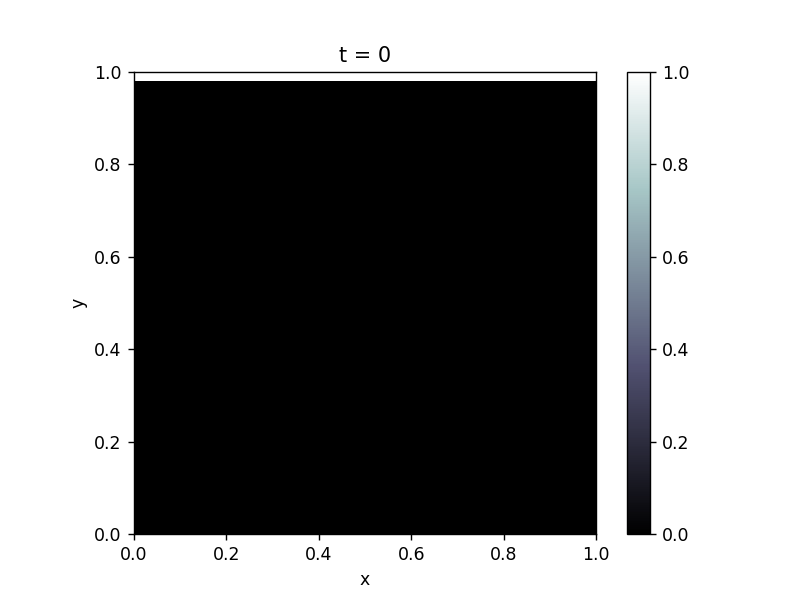

<IPython.core.display.Javascript object>


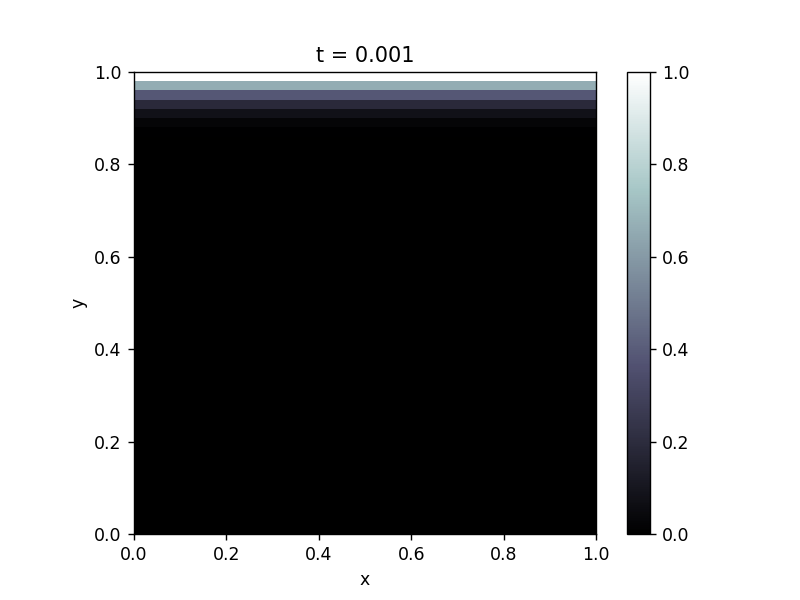

<IPython.core.display.Javascript object>


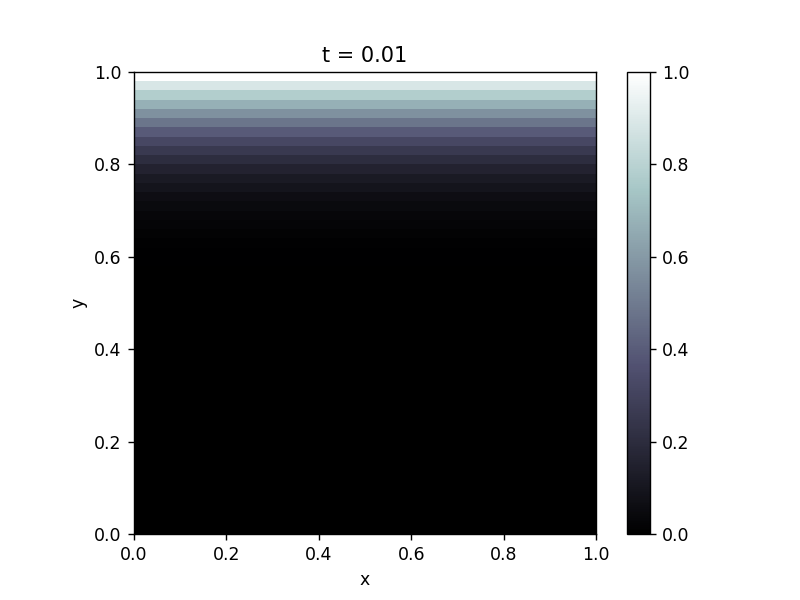

<IPython.core.display.Javascript object>


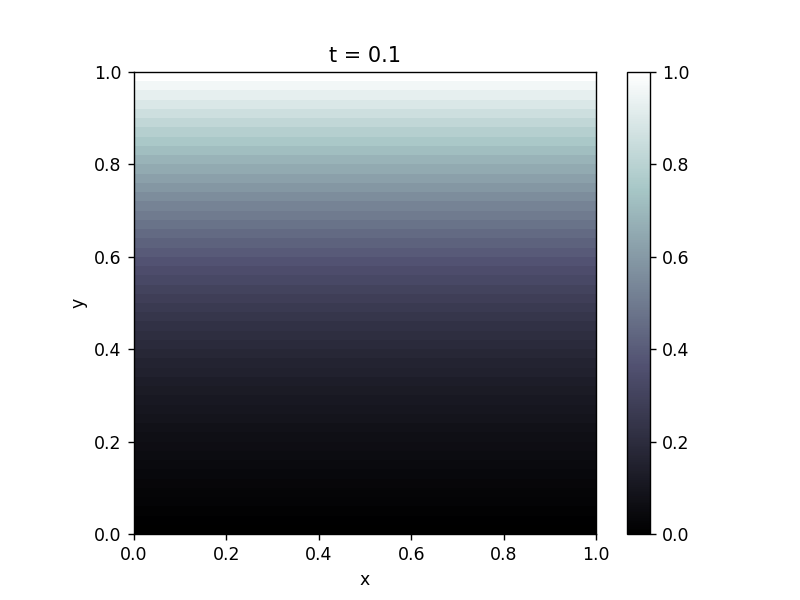

<IPython.core.display.Javascript object>


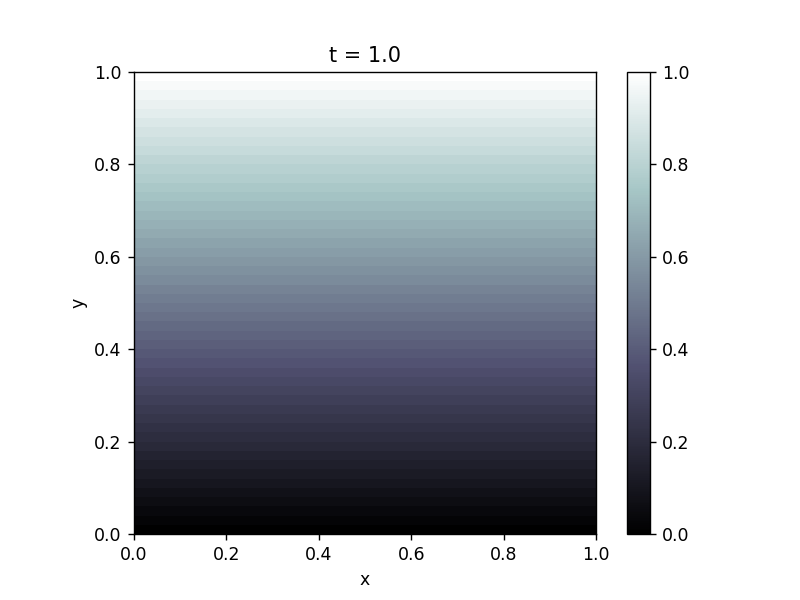

In [10]:
sim = FiniteDifference(D=1, N=50)

t_values = [0, 0.001, 0.01, 0.1, 1]

while True:
    # print progress
    if sim.t*100 % 1 == 0:
        print(f"{sim.t*100:.0f}%     ", end="\r")
        
    if sim.t in t_values:
        plt.figure()
        plt.title(f"t = {round(sim.t,8)}")
        sim.im = plt.imshow(sim.c, origin='lower', cmap='bone', extent=(0, 1, 0, 1))
        plt.colorbar()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

    if sim.t == max(t_values):
        break

    sim.update()

# Exercise G

<IPython.core.display.Javascript object>


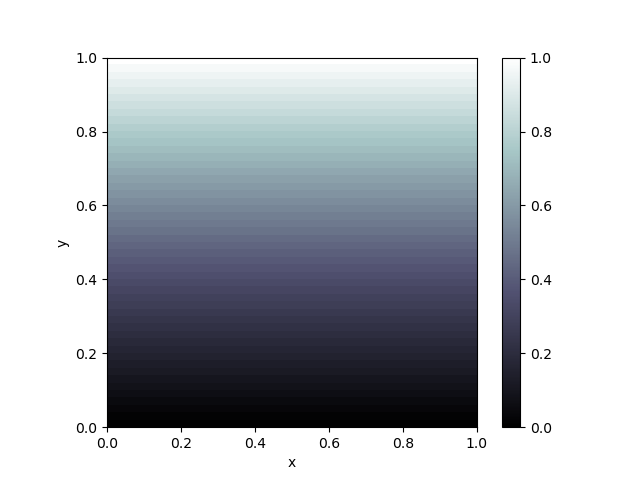

In [7]:
sim = FiniteDifference(D=1, N=50)
sim.im_animate('bone')

# Exercise H

Stopping condition met!
Stopping condition met!


<IPython.core.display.Javascript object>


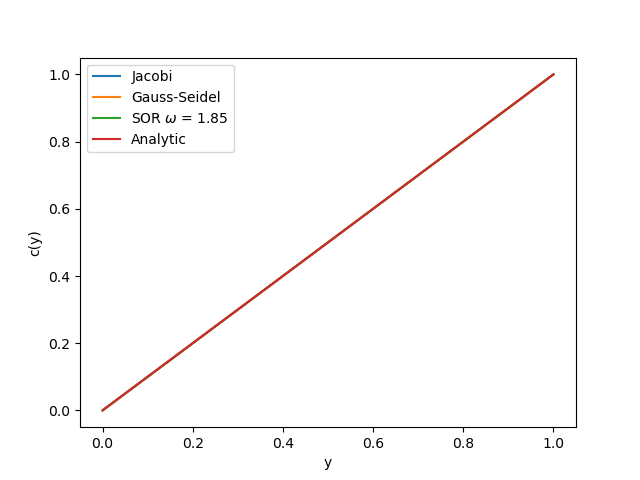

<IPython.core.display.Javascript object>


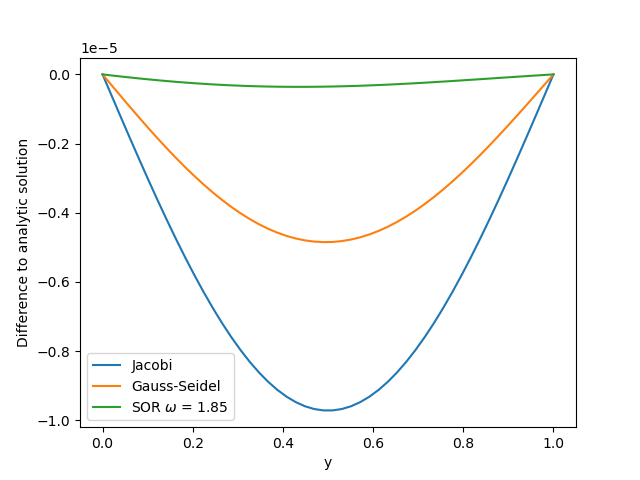

In [8]:
N = 50
precision = 10**-8
data = {}

for sim in [JacobiIteration(N=N, stopping_e=precision), 
            GaussSeidel(N=N, stopping_e=precision), 
            SuccessiveOverRelaxation(N=N, stopping_e=precision)]:
    while sim.running:
        sim.update()
    
    data[str(sim)] = sim.only_y()
    
analytic = np.array(np.linspace(0, 1, N))

plt.figure()
for key, value in data.items():
    plt.plot(np.linspace(0, 1, N), value, label=key)
plt.plot(np.linspace(0, 1, N), analytic, label="Analytic")
plt.xlabel("y")
plt.ylabel("c(y)")
plt.legend()
plt.show()

plt.figure()
for key, value in data.items():
    plt.plot(np.linspace(0, 1, N), value - analytic, label=key)
plt.xlabel("y")
plt.ylabel("Difference to analytic solution")
plt.legend()
plt.show()

# Exercise I

<IPython.core.display.Javascript object>


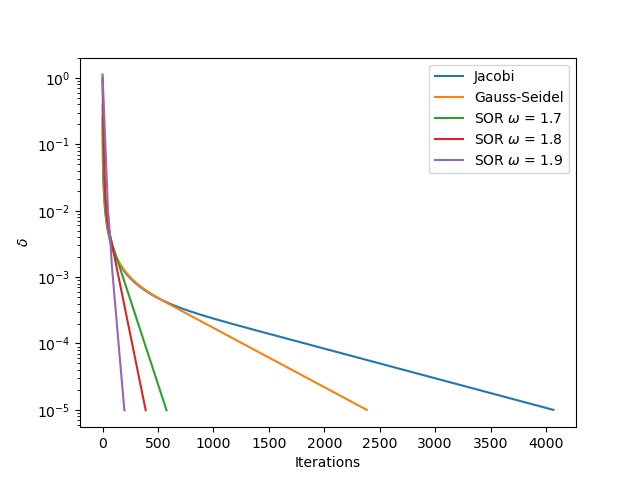

Stopping condition met!
Stopping condition met!
Stopping condition met!
Stopping condition met!
Stopping condition met!


In [8]:
plt.figure()
precision = 10**-5

for sim in [JacobiIteration(stopping_e=precision), 
            GaussSeidel(stopping_e=precision), 
            SuccessiveOverRelaxation(stopping_e=precision, omega=1.7),
            SuccessiveOverRelaxation(stopping_e=precision, omega=1.8),
            SuccessiveOverRelaxation(stopping_e=precision, omega=1.9)]:
    deltas = []

    while sim.running:
        sim.update()
        deltas.append(sim.delta)

    plt.plot(deltas, label=str(sim))

plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel(r"$\delta$")
plt.legend()
plt.show()

### Animation of the simulation with objects in it, using the SOR algorithm.

<IPython.core.display.Javascript object>


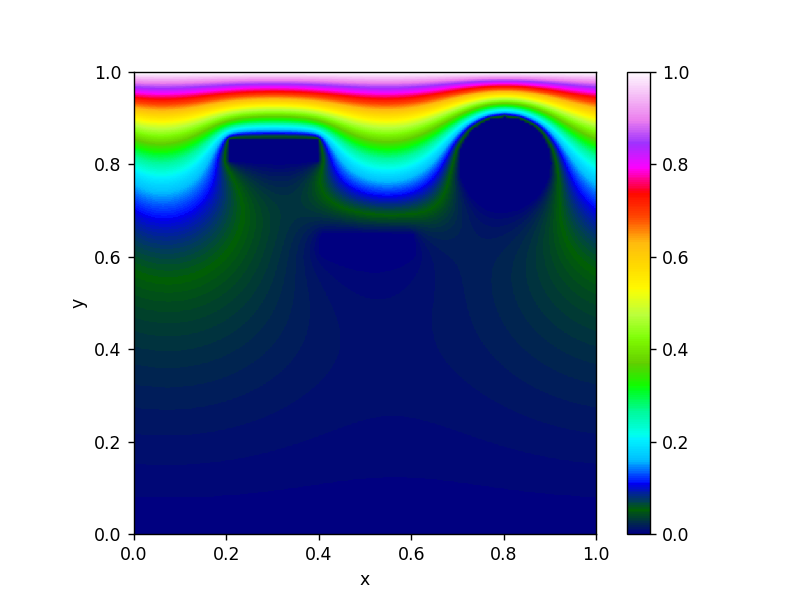

In [9]:
objects = [
    Rectangle((0.2, 0.8), 0.2, 0.05),
    Rectangle((0.4, 0.6), 0.2, 0.05),
    Circle((0.8, 0.8), 0.1),
]

sim = SuccessiveOverRelaxation(D=1, N=200, omega=1.9, objects=objects)
sim.im_animate()

# Exercise J/K

In [13]:
N_values = np.linspace(5, 200, 15, dtype=int)
    
omegas_no_objects = []
omegas_with_objects = []

iterations_no_objects = []
iterations_with_objects = []

for N in N_values:
    print(f"\rCalculating optimal omega for N={N}", end="")

    sim = SuccessiveOverRelaxation(N=N)
    optimal_omega, optimal_iteration = calc_optimal_omega(sim)
    omegas_no_objects.append(optimal_omega)
    iterations_no_objects.append(optimal_iteration)

    sim = SuccessiveOverRelaxation(objects=objects, N=N)
    optimal_omega, optimal_iteration = calc_optimal_omega(sim)
    omegas_with_objects.append(optimal_omega)
    iterations_with_objects.append(optimal_iteration)

plt.figure()
plt.plot(N_values, omegas_no_objects, label="No objects")
plt.plot(N_values, omegas_with_objects, label="With objects")

plt.xlabel("N")
plt.ylabel("Optimal omega")
plt.legend()
plt.show()

plt.figure()
plt.plot(N_values, iterations_no_objects, label="No objects")
plt.plot(N_values, iterations_with_objects, label="With objects")

plt.xlabel("N")
plt.ylabel("Iterations")
plt.legend()
plt.show()  

Calculating optimal omega for N=32

KeyboardInterrupt: 